In [1]:
import pandas as pd
import seaborn as sns
sns.set()

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from flask import Flask
import pickle

from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

import datetime
import calendar

# This config is set as False to print the model's default parameters when we print the model.
# Without this, only the parameters which are explicitly specified will be printed, not all
from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
# Details of the column can be found at 'https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv'
df = pd.read_csv('dataset/heart.csv')

In [3]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:


'''
From the documentation, we can find:
    - age : Age of the patient
    - sex : Sex of the patient
    - cp : Chest Pain type chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic
    - trtbps : resting blood pressure (in mm Hg)
    - chol : cholestoral in mg/dl fetched via BMI sensor
    - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - rest_ecg : resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - thalach : maximum heart rate achieved
    - exang: exercise induced angina (1 = yes; 0 = no)
    - oldpeak : Last peak achieved
    - slp : Slope
    - caa : number of major vessels (0-3)
    - thall : thal rate
    - output : 0= less chance of heart attack 1= more chance of heart attack
    
'''


# Lets change the column names to define some mearningful names.
columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg_result','max_heart_rate','exercise_induced_angina','prev_peak','slope','num_major_vessels','thal_rate','heart_attack_chance']

In [5]:
df.columns = columns

In [6]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_result,max_heart_rate,exercise_induced_angina,prev_peak,slope,num_major_vessels,thal_rate,heart_attack_chance
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg_result            303 non-null int64
max_heart_rate             303 non-null int64
exercise_induced_angina    303 non-null int64
prev_peak                  303 non-null float64
slope                      303 non-null int64
num_major_vessels          303 non-null int64
thal_rate                  303 non-null int64
heart_attack_chance        303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Visualization

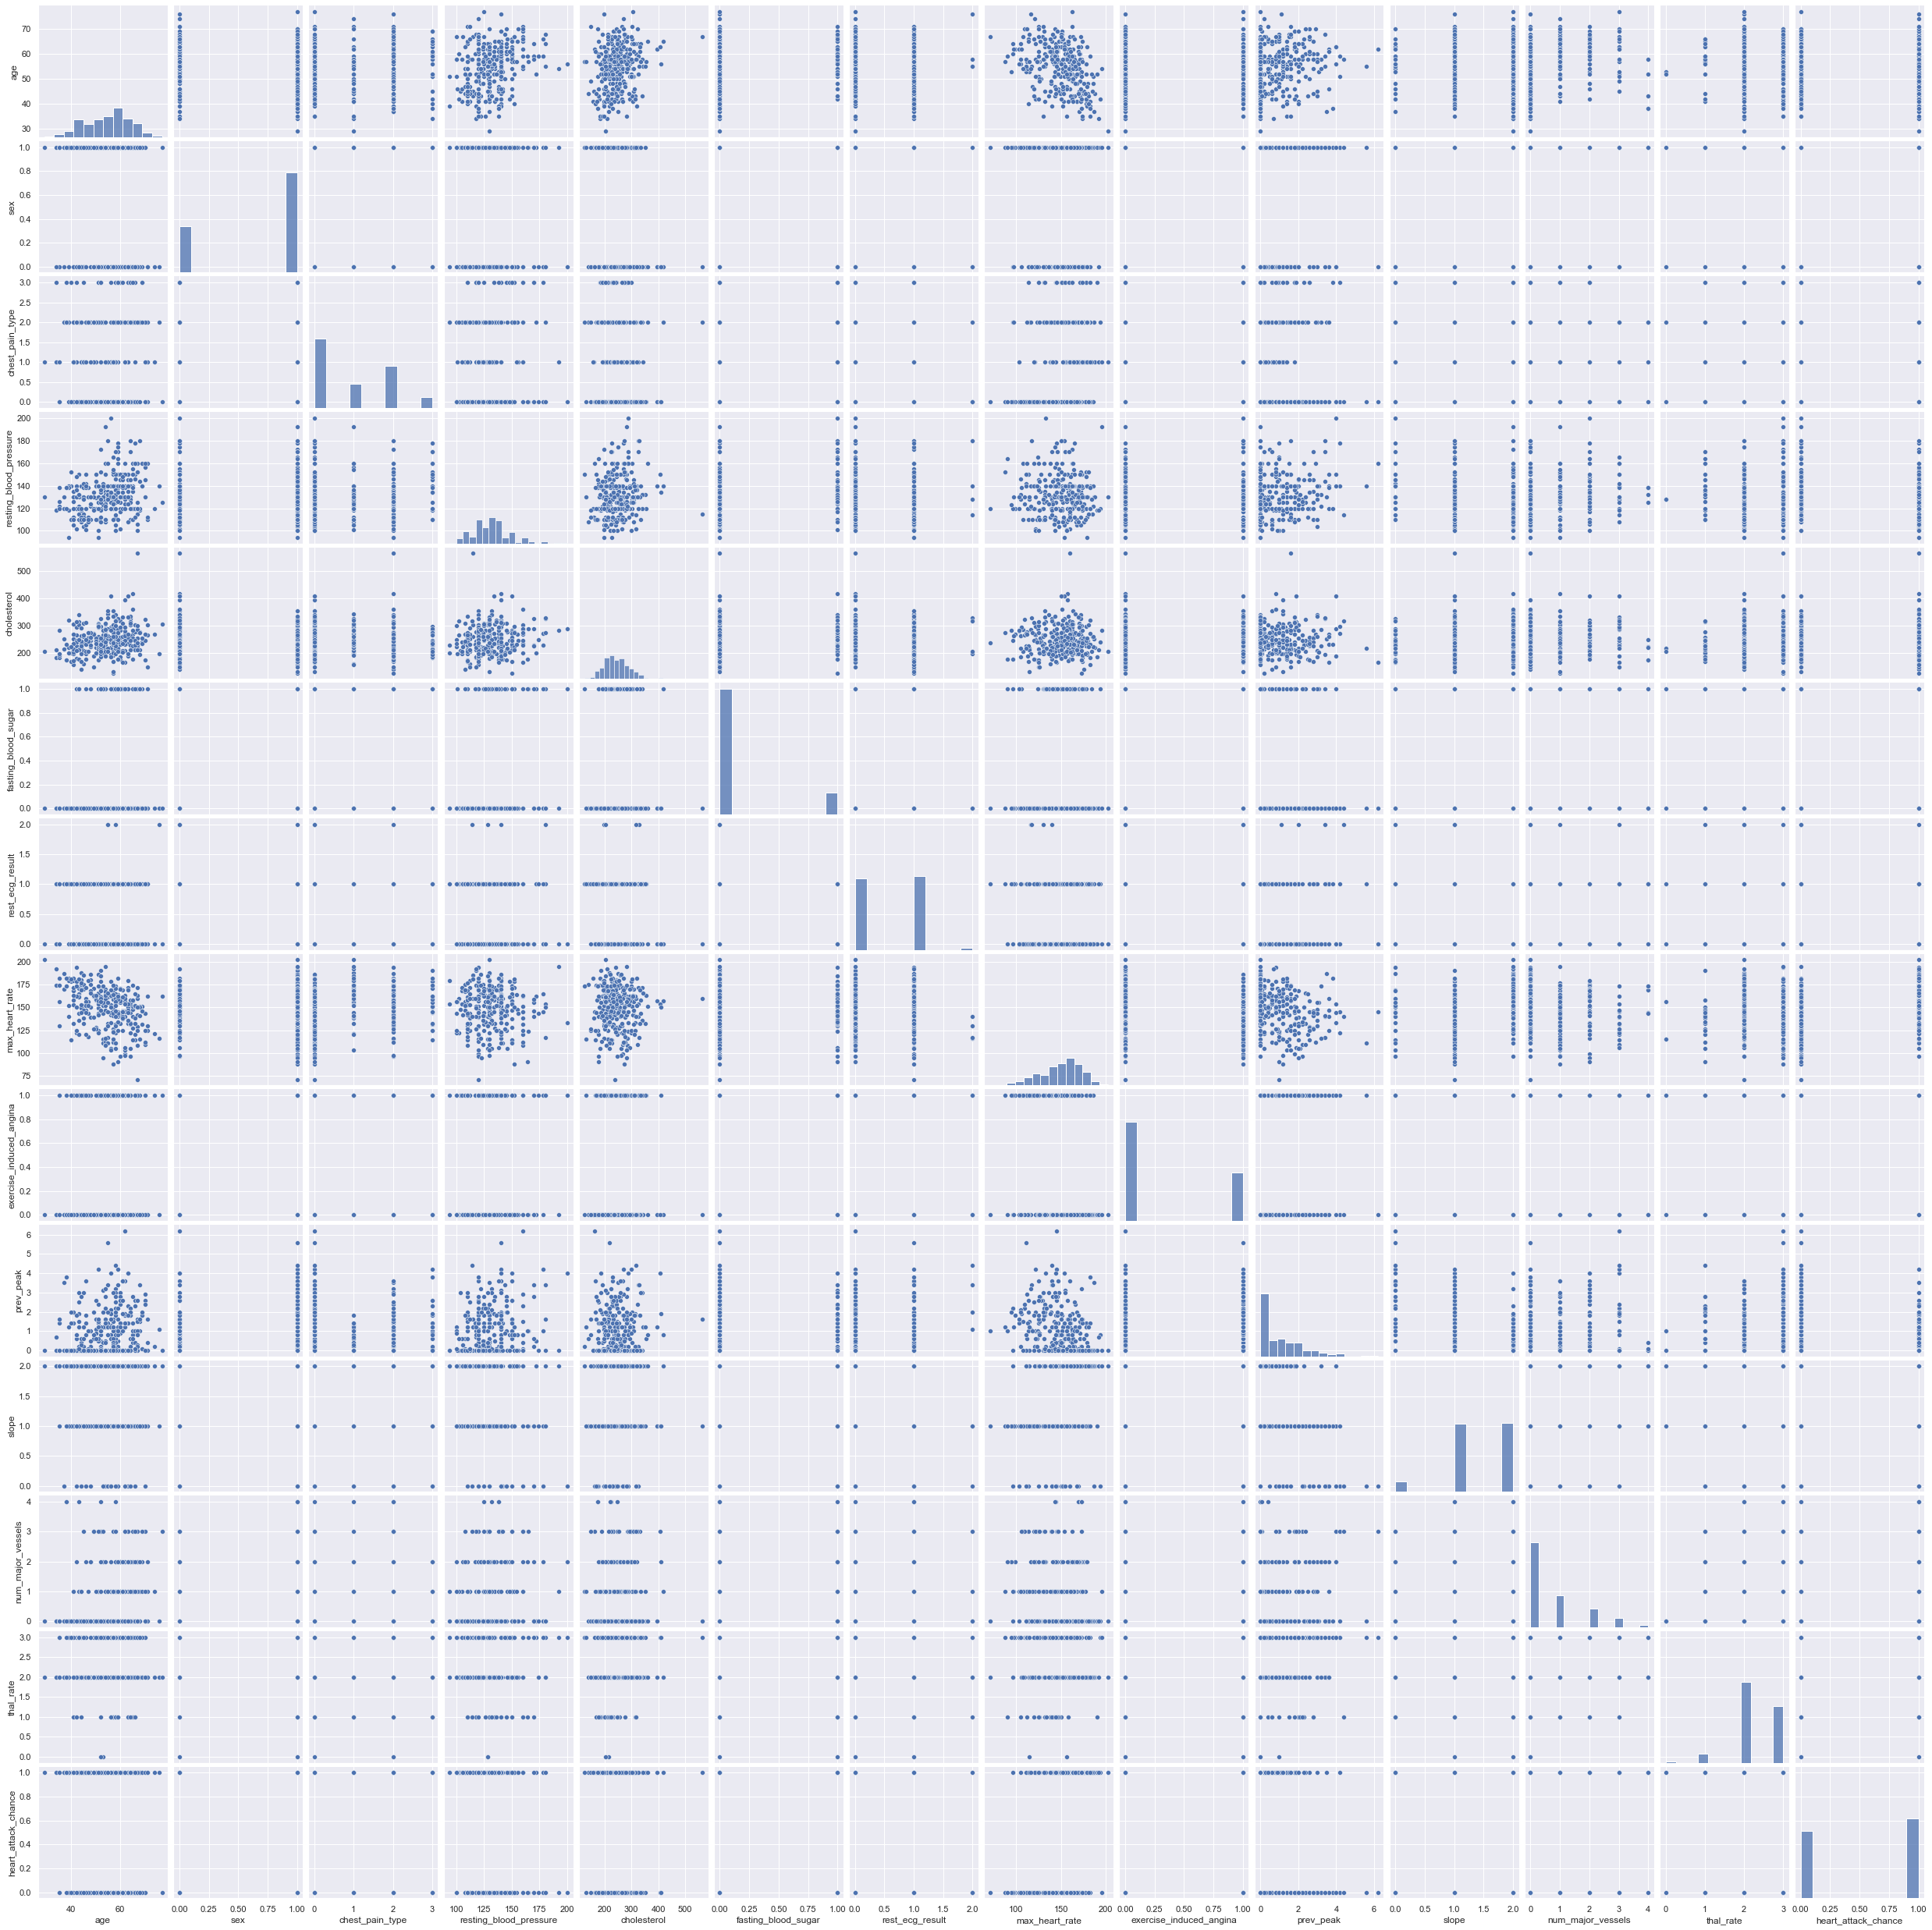

In [8]:
sns.pairplot(df)

## Data clean up 

<AxesSubplot:>

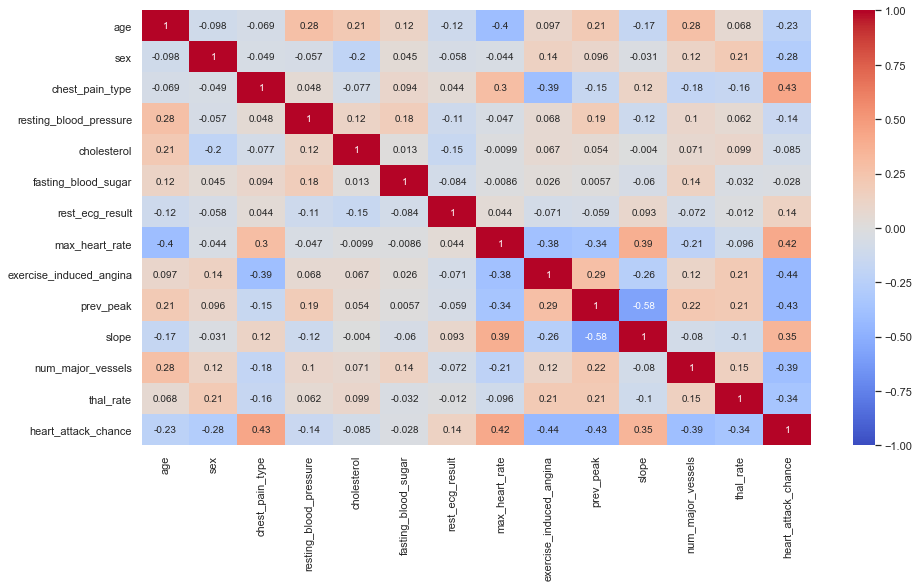

In [9]:
# Looking at the number of records in each column, it is clear that there is no missing data which is pretty good :)
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='coolwarm',vmin = -1, vmax = 1,annot=True)

## Data Visualization

<AxesSubplot:xlabel='heart_attack_chance', ylabel='count'>

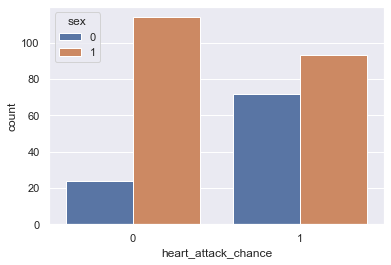

In [10]:
# Check the chance of heart attacks
sns.countplot(x='heart_attack_chance',hue='sex',data=df)

In [11]:
#plt.figure(figsize=(20,20))
#sns.kdeplot(data=df)

In [12]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_result',
       'max_heart_rate', 'exercise_induced_angina', 'prev_peak', 'slope',
       'num_major_vessels', 'thal_rate', 'heart_attack_chance'],
      dtype='object')

In [13]:
def plot_graph(plot_index,column_name, title):
    sub_plot = sns.kdeplot(x=df[column_name],hue=df.heart_attack_chance,shade=True,palette='Blues',ax=plot_index)
    sub_plot.set_title(column_name)

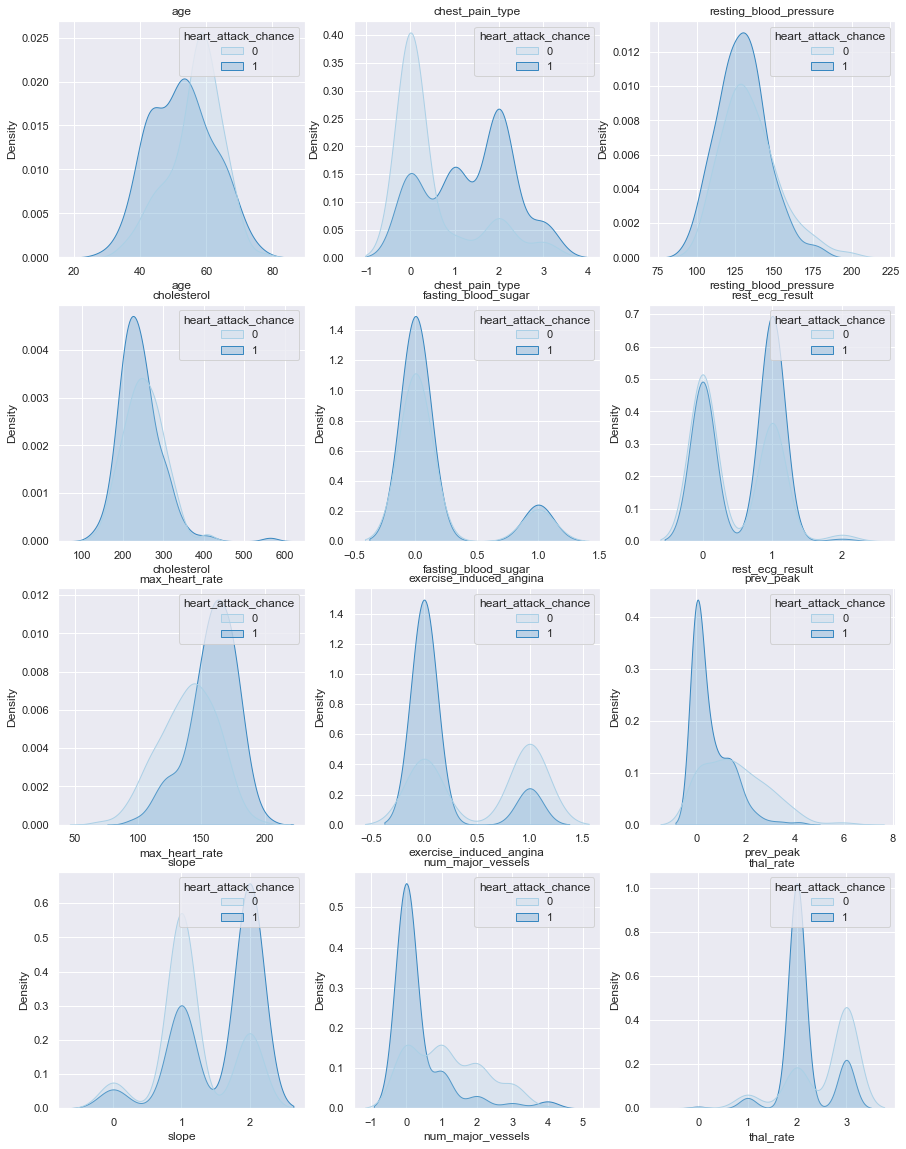

In [14]:
figure,axis = plt.subplots(4,3,figsize=(15,20))
plot_graph(axis[0,0],'age','Age')
plot_graph(axis[0,1],'chest_pain_type','Chest Pain Type')
plot_graph(axis[0,2],'resting_blood_pressure','Resting Blood Pressure')
plot_graph(axis[1,0],'cholesterol','Cholesterol')
plot_graph(axis[1,1],'fasting_blood_sugar','Fasting Blood Sugar')
plot_graph(axis[1,2],'rest_ecg_result','ECG Result (Rest)')
plot_graph(axis[2,0],'max_heart_rate','Max Heart Rate')
plot_graph(axis[2,1],'exercise_induced_angina','Exercise Induced Angina')
plot_graph(axis[2,2],'prev_peak','Previous Peak')
plot_graph(axis[3,0],'slope','Slope')
plot_graph(axis[3,1],'num_major_vessels','No. of Major Vessels')
plot_graph(axis[3,2],'thal_rate','Thal Rate')


# Find & convert Categorical features into one hot encoding --- Check if this part is really required

Below are the categorical features. The feature values are in 0/1. So, first we would convert these to categorical
values and then will convert this to one-hot encoding
1. sex (0/1)
2. fasting_blood_sugar (0/1)
3. exercise_induced_angina (0/1)

### Before update

In [50]:
print(df.sex.value_counts())
print("\n",df.fasting_blood_sugar.value_counts())
print("\n",df.exercise_induced_angina.value_counts())

1    207
0     96
Name: sex, dtype: int64

 0    258
1     45
Name: fasting_blood_sugar, dtype: int64

 0    204
1     99
Name: exercise_induced_angina, dtype: int64


In [51]:
# For sex: Convert 0/1 to female/male
df.sex = df.sex.apply(lambda x : 'male' if x==1 else 'female')
df.fasting_blood_sugar = df.fasting_blood_sugar.apply(lambda x: 'yes' if x==1 else 'no')
df.exercise_induced_angina = df.exercise_induced_angina.apply(lambda x: 'yes' if x==1 else 'no')
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_result,max_heart_rate,exercise_induced_angina,prev_peak,slope,num_major_vessels,thal_rate,heart_attack_chance
0,63,male,3,145,233,yes,0,150,no,2.3,0,0,1,1
1,37,male,2,130,250,no,1,187,no,3.5,0,0,2,1
2,41,female,1,130,204,no,0,172,no,1.4,2,0,2,1
3,56,male,1,120,236,no,1,178,no,0.8,2,0,2,1
4,57,female,0,120,354,no,1,163,yes,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,no,1,123,yes,0.2,1,0,3,0
299,45,male,3,110,264,no,1,132,no,1.2,1,0,3,0
300,68,male,0,144,193,yes,1,141,no,3.4,1,2,3,0
301,57,male,0,130,131,no,1,115,yes,1.2,1,1,3,0


### After update

In [52]:
print(df.sex.value_counts())
print("\n",df.fasting_blood_sugar.value_counts())
print("\n",df.exercise_induced_angina.value_counts())

male      207
female     96
Name: sex, dtype: int64

 no     258
yes     45
Name: fasting_blood_sugar, dtype: int64

 no     204
yes     99
Name: exercise_induced_angina, dtype: int64


In [53]:
# One hot encoding
df = pd.get_dummies(df, columns=['sex','fasting_blood_sugar','exercise_induced_angina'],drop_first=True)
df

,age,chest_pain_type,resting_blood_pressure,cholesterol,rest_ecg_result,max_heart_rate,prev_peak,slope,num_major_vessels,thal_rate,heart_attack_chance,sex_male,fasting_blood_sugar_yes,exercise_induced_angina_yes
0,63,3,145,233,0,150,2.3,0,0,1,1,1,1,0
1,37,2,130,250,1,187,3.5,0,0,2,1,1,0,0
2,41,1,130,204,0,172,1.4,2,0,2,1,0,0,0
3,56,1,120,236,1,178,0.8,2,0,2,1,1,0,0
4,57,0,120,354,1,163,0.6,2,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,1,123,0.2,1,0,3,0,0,0,1
299,45,3,110,264,1,132,1.2,1,0,3,0,1,0,0
300,68,0,144,193,1,141,3.4,1,2,3,0,1,1,0
301,57,0,130,131,1,115,1.2,1,1,3,0,1,0,1


# Prepare data for training & model building

In [15]:
X = df.copy().drop(['heart_attack_chance'],axis=1)

Y = df['heart_attack_chance']
print('Shape of X {}'.format(X.shape))
print('Shape of Y {}'.format(Y.shape))

Shape of X (303, 13)
Shape of Y (303,)


# Feature Selection - 
 -------- TODO -------

### Check important features - Just for reference (We are not dropping/selecting any feature based on this for now)
THIS SECTION NEEDS TO BE REVISITED - NOT WORKING CORRECTLY

In [16]:
# Check feature importance to identify the most important features
from sklearn.ensemble import ExtraTreesRegressor # As this is a regression problem
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

[0.05717953 0.03337374 0.17946623 0.04619529 0.04998812 0.01559751
 0.03929495 0.06053316 0.10889696 0.07306662 0.05976421 0.15508718
 0.12155649]


<AxesSubplot:>

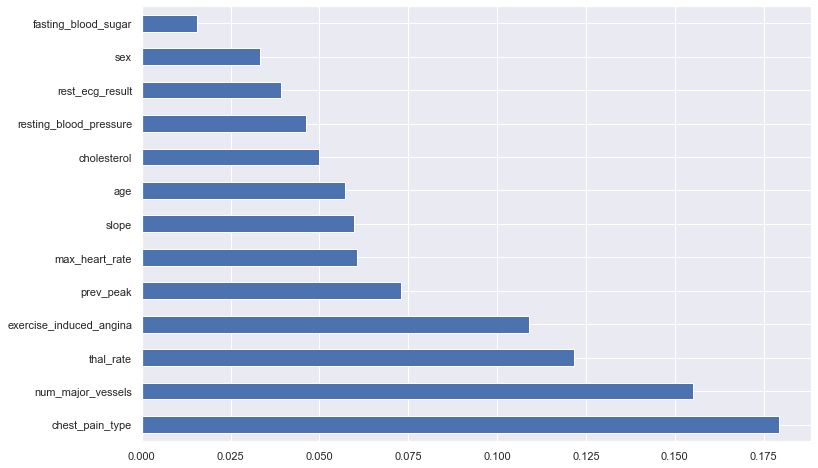

In [17]:
print(model.feature_importances_)

# Let's visualize this feature importances (Top 5 features)
plt.figure(figsize = (12,8))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')

In [18]:
# Considering all columns
selected_columns = feature_importance.nlargest(20).index
selected_columns

Index(['chest_pain_type', 'num_major_vessels', 'thal_rate',
       'exercise_induced_angina', 'prev_peak', 'max_heart_rate', 'slope',
       'age', 'cholesterol', 'resting_blood_pressure', 'rest_ecg_result',
       'sex', 'fasting_blood_sugar'],
      dtype='object')

In [19]:
X = X[selected_columns]

In [20]:
X.shape

(303, 13)

#### Training & Test set preparation

In [74]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit(X)
X_std = std_scaler.transform(X)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std,Y, test_size=0.3, random_state=20)

# Model Preparation & Training

## 1. Using RandomForestClassifier

In [23]:
# No. of decision trees in the random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200,num=12)]
# No. of features to consider at every split
max_features = ['auto','sqrt']
# Maximum no. of levels in tree
max_depth = [int(x) for x in np.linspace(start=5, stop=50, num=5)]
# Minimum no. of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum no. of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [24]:
# RandomizedSearchCV is little faster than GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 16, 27, 38, 50], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [25]:
# We will use the Random grid search to choose the best hyper parameter
# We will start with the base model and then use the parameter grid to choose the best parameter and get the best model
from sklearn.ensemble import RandomForestClassifier
base_rnd_reg_model = RandomForestClassifier()
rnd_reg_model = RandomizedSearchCV(
                    estimator=base_rnd_reg_model,
                    param_distributions=random_grid,
                    scoring='neg_mean_squared_error',
                    n_iter=10,
                    cv=5, # 5-fold cross validation
                    verbose=2, # To show the details of training process
                    random_state=42,
                    n_jobs=1) # n_job=1 --> All the cores of the CPU will be used

rnd_reg_model.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [26]:
rnd_reg_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 27}

In [27]:
# Predict
rnd_reg_predictions = rnd_reg_model.predict(X_test)

In [28]:
# See the correctness of predictions
accuracy = confusion_matrix(Y_test, rnd_reg_predictions)
accuracy

array([[34,  5],
       [ 9, 43]])

In [29]:
# Check the accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, rnd_reg_predictions)
acc_score

0.8461538461538461

In [30]:
print(classification_report(Y_test, rnd_reg_predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        39
           1       0.90      0.83      0.86        52

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.85      0.85      0.85        91



## 2. Using SVM

In [31]:
svm_parameters = [{
                    'C': [0.001, 0.01, 0.1, 1, 10, 100,1000], 
                    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                    'kernel' : ['rbf']
                 },
                {
                    'C': [0.001, 0.01, 0.1, 1, 10, 100,1000], 
                    'kernel' : ['linear']
                }]

scoring = ['precision','recall']

In [32]:
from sklearn.model_selection import GridSearchCV

### 0. Without explicit scoring

In [33]:
# We will use the Random grid search to choose the best hyper parameter
# We will start with the base model and then use the parameter grid to choose the best parameter and get the best model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
base_svm_model = SVC()

svm_model = GridSearchCV(
                    estimator=base_svm_model,
                    param_grid=svm_parameters,
                    refit= True,
                    verbose=2, # To show the details of training process
                    n_jobs=1) # n_job=1 --> All the cores of the CPU will be used

svm_model.fit(X_train,Y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ...............................C=100, kernel=linear; total time=   0.2s
[CV] END ...............................C=100, kernel=linear; total time=   0.0s
[CV] END ...............................C=100, kernel=linear; total time=   0.1s
[CV] END ...............................C=100, kernel=linear; total time=   0.1s
[CV] END ...............................C=100, kernel=linear; total time=   0.0s
[CV] END ..............................C=1000, kernel=linear; total time=   1.3s
[CV] END ..............................C=1000, kernel=linear; total time=   0.4s
[CV] END ..............................C=1000, kernel=linear; total time=   0.5s
[CV] END ..............................C=1000, kernel=linear; total time=   0.9s
[CV] END ..............................C=1000, kernel=linear; total time=   0.3s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [34]:
svm_model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [35]:
# Predict
svm_model_predictions = svm_model.predict(X_test)

In [36]:
# See the correctness of predictions
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_test, svm_model_predictions)
accuracy

array([[32,  7],
       [11, 41]])

In [37]:
# Check the accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, svm_model_predictions)
acc_score

0.8021978021978022

In [38]:
print(classification_report(Y_test, svm_model_predictions))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        39
           1       0.85      0.79      0.82        52

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



### 1. Using scoring = PRECISION

In [39]:
# We will use the Random grid search to choose the best hyper parameter
# We will start with the base model and then use the parameter grid to choose the best parameter and get the best model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
base_svm_model = SVC()

svm_model = GridSearchCV(
                    estimator=base_svm_model,
                    param_grid=svm_parameters,
                    scoring='precision',
                    refit=True,
                    verbose=2, # To show the details of training process
                    n_jobs=1) # n_job=1 --> All the cores of the CPU will be used

svm_model.fit(X_train,Y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.

[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=2)

In [40]:
svm_model.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [41]:
# Predict
svm_model_predictions = svm_model.predict(X_test)

In [42]:
# See the correctness of predictions
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_test, svm_model_predictions)
accuracy

array([[31,  8],
       [13, 39]])

In [43]:
# Check the accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, svm_model_predictions)
acc_score

0.7692307692307693

### 2. Using scoring=RECALL

In [44]:
# We will use the Random grid search to choose the best hyper parameter
# We will start with the base model and then use the parameter grid to choose the best parameter and get the best model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
base_svm_model = SVC()

svm_model = GridSearchCV(
                    estimator=base_svm_model,
                    param_grid=svm_parameters,
                    scoring='recall',
                    refit=True,
                    verbose=2, # To show the details of training process
                    n_jobs=1) # n_job=1 --> All the cores of the CPU will be used

svm_model.fit(X_train,Y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=0.

[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END .............................C=0.001, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=2)

In [45]:
svm_model.best_params_

{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}

In [46]:
# Predict
svm_model_predictions = svm_model.predict(X_test)

In [47]:
# See the correctness of predictions
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_test, svm_model_predictions)
accuracy

array([[ 0, 39],
       [ 0, 52]])

In [48]:
# Check the accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, svm_model_predictions)
acc_score

0.5714285714285714

# 3. Using Naive-Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
base_nb_model = GaussianNB()
base_nb_model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
# Predict
nb_predictions = base_nb_model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_test, nb_predictions)
accuracy

array([[30,  9],
       [17, 35]])

In [52]:
# Check the accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, svm_model_predictions)
acc_score

0.5714285714285714

### NOTE : We can see the best model till now is the RandomForestRegressor. 

## 4. Using Neural Network

In [53]:
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler

In [76]:
# Define the metrics
METRICS = [
              tensorflow.keras.metrics.TruePositives(name='true_pos'),
              tensorflow.keras.metrics.FalsePositives(name='false_pos'),
              tensorflow.keras.metrics.TrueNegatives(name='true_neg'),
              tensorflow.keras.metrics.FalseNegatives(name='false_neg'), 
              tensorflow.keras.metrics.BinaryAccuracy(name='accuracy'),
              tensorflow.keras.metrics.Precision(name='precision'),
              tensorflow.keras.metrics.Recall(name='recall'),
              tensorflow.keras.metrics.AUC(name='auc'),
              tensorflow.keras.metrics.AUC(name='prc', curve='PR')
           ]

In [77]:
# Define the model
nn_model = Sequential()
nn_model.add(Dense(128,activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1,activation='sigmoid'))

In [78]:
adam = Adam(learning_rate=1e-3)

# Compile the model
nn_model.compile(optimizer=adam,loss=tensorflow.keras.losses.binary_crossentropy,metrics=METRICS)

# Define the call back
early_stopping = EarlyStopping(monitor='val_acc',mode='max',patience=10, verbose=1,restore_best_weights=True)


In [91]:
from sklearn.model_selection import train_test_split

# Split the entire dataset into 3 parts. Training Set, Validation Set and Test Set
X_temp, X_test, Y_temp, Y_test = train_test_split(X,Y, test_size=0.15, random_state=20)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=20)


# Standardize the input features to have a mean of 0 and standard deviation as 1
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_valid = std_scaler.transform(X_valid)
X_test = std_scaler.transform(X_test)


In [92]:
# Train the model
nn_model.fit(X_train, Y_train, callbacks=[early_stopping],verbose=1, batch_size=1, epochs=20, validation_data=(X_valid,Y_valid))

Epoch 1/20
205/205 [==============================] - 1s 6ms/step - loss: 0.2795 - true_pos: 98.0000 - false_pos: 12.0000 - true_neg: 85.0000 - false_neg: 10.0000 - accuracy: 0.8927 - precision: 0.8909 - recall: 0.9074 - auc: 0.9544 - prc: 0.9531 - val_loss: 0.2330 - val_true_pos: 27.0000 - val_false_pos: 3.0000 - val_true_neg: 18.0000 - val_false_neg: 4.0000 - val_accuracy: 0.8654 - val_precision: 0.9000 - val_recall: 0.8710 - val_auc: 0.9677 - val_prc: 0.9806
Epoch 2/20
205/205 [==============================] - 0s 2ms/step - loss: 0.2911 - true_pos: 97.0000 - false_pos: 12.0000 - true_neg: 85.0000 - false_neg: 11.0000 - accuracy: 0.8878 - precision: 0.8899 - recall: 0.8981 - auc: 0.9500 - prc: 0.9377 - val_loss: 0.2267 - val_true_pos: 28.0000 - val_false_pos: 3.0000 - val_true_neg: 18.0000 - val_false_neg: 3.0000 - val_accuracy: 0.8846 - val_precision: 0.9032 - val_recall: 0.9032 - val_auc: 0.9716 - val_prc: 0.9827
Epoch 3/20
205/205 [==============================] - 0s 2ms/step - 

Epoch 12/20
205/205 [==============================] - 1s 3ms/step - loss: 0.1963 - true_pos: 102.0000 - false_pos: 8.0000 - true_neg: 89.0000 - false_neg: 6.0000 - accuracy: 0.9317 - precision: 0.9273 - recall: 0.9444 - auc: 0.9751 - prc: 0.9724 - val_loss: 0.2582 - val_true_pos: 28.0000 - val_false_pos: 3.0000 - val_true_neg: 18.0000 - val_false_neg: 3.0000 - val_accuracy: 0.8846 - val_precision: 0.9032 - val_recall: 0.9032 - val_auc: 0.9570 - val_prc: 0.9749
Epoch 13/20
205/205 [==============================] - 1s 3ms/step - loss: 0.1982 - true_pos: 106.0000 - false_pos: 7.0000 - true_neg: 90.0000 - false_neg: 2.0000 - accuracy: 0.9561 - precision: 0.9381 - recall: 0.9815 - auc: 0.9752 - prc: 0.9764 - val_loss: 0.2563 - val_true_pos: 27.0000 - val_false_pos: 2.0000 - val_true_neg: 19.0000 - val_false_neg: 4.0000 - val_accuracy: 0.8846 - val_precision: 0.9310 - val_recall: 0.8710 - val_auc: 0.9585 - val_prc: 0.9756
Epoch 14/20
205/205 [==============================] - 1s 3ms/step -

In [93]:
# Prediction using the model
nn_model_predictions = nn_model.predict(X_test)

In [94]:
threshold = 0.5

confusion_matrix(Y_test,nn_model_predictions>=threshold)

array([[15,  5],
       [ 4, 22]])

In [95]:
nn_model.metrics_names

['loss',
 'true_pos',
 'false_pos',
 'true_neg',
 'false_neg',
 'accuracy',
 'precision',
 'recall',
 'auc',
 'prc']

In [96]:
test_result = nn_model.evaluate(X_test, Y_test, verbose=0)

for metric_name,value in zip(nn_model.metrics_names,test_result):
    print(f'{metric_name} : {value}')

loss : 0.4934355616569519
true_pos : 22.0
false_pos : 5.0
true_neg : 15.0
false_neg : 4.0
accuracy : 0.804347813129425
precision : 0.8148148059844971
recall : 0.8461538553237915
auc : 0.857692301273346
prc : 0.8799334764480591
